In [ ]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from src.utils.feature_extraction import calculate_pattern_entropy_features, calculate_distribution_features, calculate_structural_features, calculate_statistical_features

In [48]:
# Read the CSV file
df = pd.read_csv('./../data/no_padding/single/single-data-1731075630631494800.csv', delimiter=";")

In [43]:
df.head()

concatenated_bitstrings  num_included  \
0  1000100000101000000101011000010000101010000101...           488   
1  0011000001100010100010010001110000100000001010...           440   
2  0000111110100000100010001111000010111111111110...           111   
3  1011101000010010001010000110000010001001001000...           392   
4  0110110001100000001011110100000001010011101000...           465   

   num_excluded  duration  tries  
0           882  0.055105      1  
1           885  0.052081      1  
2           875  0.037792      1  
3           869  0.046305      1  
4           642  0.047824      1

In [49]:
# Function to count non-empty filters for each row
def count_non_empty_filters(bitstring):
    filters = bitstring.split(',')
    return len([f for f in filters if f and not all(bit == '0' for bit in f)])

# Add column for number of non-empty filters
df['num_non_empty_filters'] = df['concatenated_bitstrings'].apply(count_non_empty_filters)

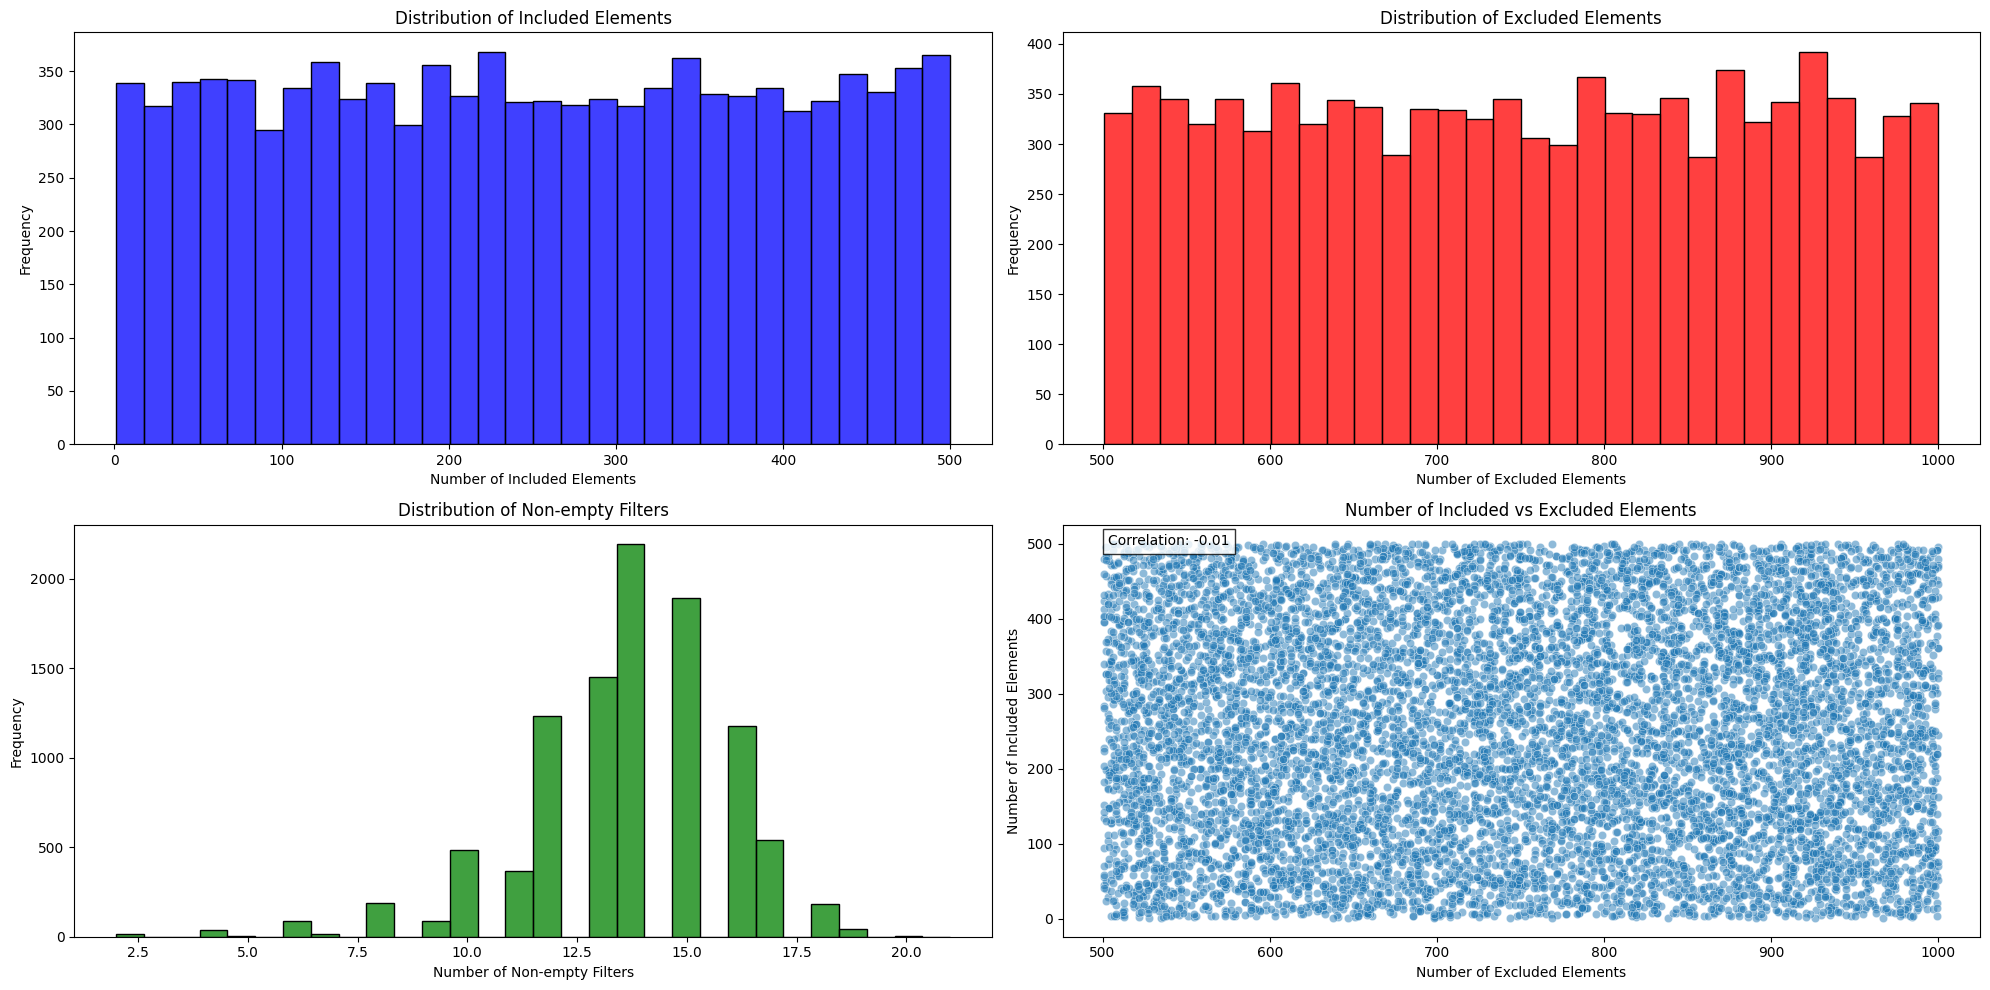

In [45]:
# Create figure with subplots
plt.figure(figsize=(20, 10))

# Plot 1: Distribution of included elements
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='num_included', bins=30, color='blue')
plt.title('Distribution of Included Elements')
plt.xlabel('Number of Included Elements')
plt.ylabel('Frequency')

# Plot 2: Distribution of excluded elements
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='num_excluded', bins=30, color='red')
plt.title('Distribution of Excluded Elements')
plt.xlabel('Number of Excluded Elements')
plt.ylabel('Frequency')

# Plot 3: Distribution of non-empty filters
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='num_non_empty_filters', bins=30, color='green')
plt.title('Distribution of Non-empty Filters')
plt.xlabel('Number of Non-empty Filters')
plt.ylabel('Frequency')

# Plot 4: Scatter plot of excluded vs included
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='num_excluded', y='num_included', alpha=0.5)
plt.title('Number of Included vs Excluded Elements')
plt.xlabel('Number of Excluded Elements')
plt.ylabel('Number of Included Elements')

# Calculate correlation
correlation = df['num_included'].corr(df['num_excluded'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [50]:
def process_bitstring_row(row: str) -> str:
    """Clean individual bitstring row by removing extra characters."""
    return row.strip(',')

# Clean the concatenated_bitstrings column
df['concatenated_bitstrings'] = df['concatenated_bitstrings'].apply(process_bitstring_row)

In [58]:
df.head()

concatenated_bitstrings  num_included  \
0  1000100000101000000101011000010000101010000101...           488   
1  0011000001100010100010010001110000100000001010...           440   
2  0000111110100000100010001111000010111111111110...           111   
3  1011101000010010001010000110000010001001001000...           392   
4  0110110001100000001011110100000001010011101000...           465   

   num_excluded  duration  tries  num_non_empty_filters  
0           882  0.055105      1                     15  
1           885  0.052081      1                     16  
2           875  0.037792      1                     15  
3           869  0.046305      1                     17  
4           642  0.047824      1                     16

In [ ]:
# Apply the pattern entropy features to each row
entropy_features = df['concatenated_bitstrings'].apply(calculate_pattern_entropy_features)

In [59]:
entropy_features.head()

0    {'bigram_entropy_filter_0': 1.8918433618371344...
1    {'bigram_entropy_filter_0': 1.826445899901416,...
2    {'bigram_entropy_filter_0': 0.7297683343411596...
3    {'bigram_entropy_filter_0': 1.746642145008864,...
4    {'bigram_entropy_filter_0': 1.8529613697563585...
Name: concatenated_bitstrings, dtype: object

In [60]:
# Convert series of dictionaries to proper DataFrame
entropy_df = pd.DataFrame(entropy_features.tolist())

In [61]:
entropy_df.head()

bigram_entropy_filter_0  trigram_entropy_filter_0  byte_entropy_filter_0  \
0                 1.891843                  2.836922               6.291589   
1                 1.826446                  2.737858               5.973800   
2                 0.729768                  1.028677               1.633550   
3                 1.746642                  2.598065               5.546950   
4                 1.852961                  2.773959               6.146167   

   sliding_window_entropy_filter_0  conditional_entropy_filter_0  \
0                         3.780325                      0.944908   
1                         3.632719                      0.913135   
2                         1.291826                      0.327459   
3                         3.441486                      0.870011   
4                         3.687178                      0.923451   

   bigram_entropy_filter_1  trigram_entropy_filter_1  byte_entropy_filter_1  \
0                 1.911356                  2.828022               5.108695   
1                 1.904836                  2.801633               5.188045   
2                 1.767388                  2.580872               4.510910   
3                 1.842595                  2.725352               5.043945   
4                 1.586327                  2.309364               3.779163   

   sliding_window_entropy_filter_1  conditional_entropy_filter_1  ...  \
0                         3.716498                      0.941889  ...   
1                         3.675752                      0.941269  ...   
2                         3.330151                      0.865543  ...   
3                         3.562620                      0.916672  ...   
4                         2.936765                      0.769515  ...   

   bigram_entropy_filter_19  trigram_entropy_filter_19  \
0                      -0.0                       -0.0   
1                      -0.0                       -0.0   
2                      -0.0                       -0.0   
3                      -0.0                       -0.0   
4                      -0.0                       -0.0   

   byte_entropy_filter_19  sliding_window_entropy_filter_19  \
0                    -0.0                              -0.0   
1                    -0.0                              -0.0   
2                    -0.0                              -0.0   
3                    -0.0                              -0.0   
4                    -0.0                              -0.0   

   conditional_entropy_filter_19  bigram_entropy_filter_20  \
0                            0.0                      -0.0   
1                            0.0                      -0.0   
2                            0.0                      -0.0   
3                            0.0                      -0.0   
4                            0.0                      -0.0   

   trigram_entropy_filter_20  byte_entropy_filter_20  \
0                       -0.0                    -0.0   
1                       -0.0                    -0.0   
2                       -0.0                    -0.0   
3                       -0.0                    -0.0   
4                       -0.0                    -0.0   

   sliding_window_entropy_filter_20  conditional_entropy_filter_20  
0                              -0.0                            0.0  
1                              -0.0                            0.0  
2                              -0.0                            0.0  
3                              -0.0                            0.0  
4                              -0.0                            0.0  

[5 rows x 105 columns]

In [85]:
# Select columns for specified filters
filters = [0, 5, 10, 15, 20]
all_cols = []
for f in filters:
    filter_cols = [col for col in entropy_df.columns if f'filter_{f}' in col]
    all_cols.extend(filter_cols)

In [77]:
# Add num_excluded to entropy_df
entropy_df['num_excluded'] = df['num_excluded']

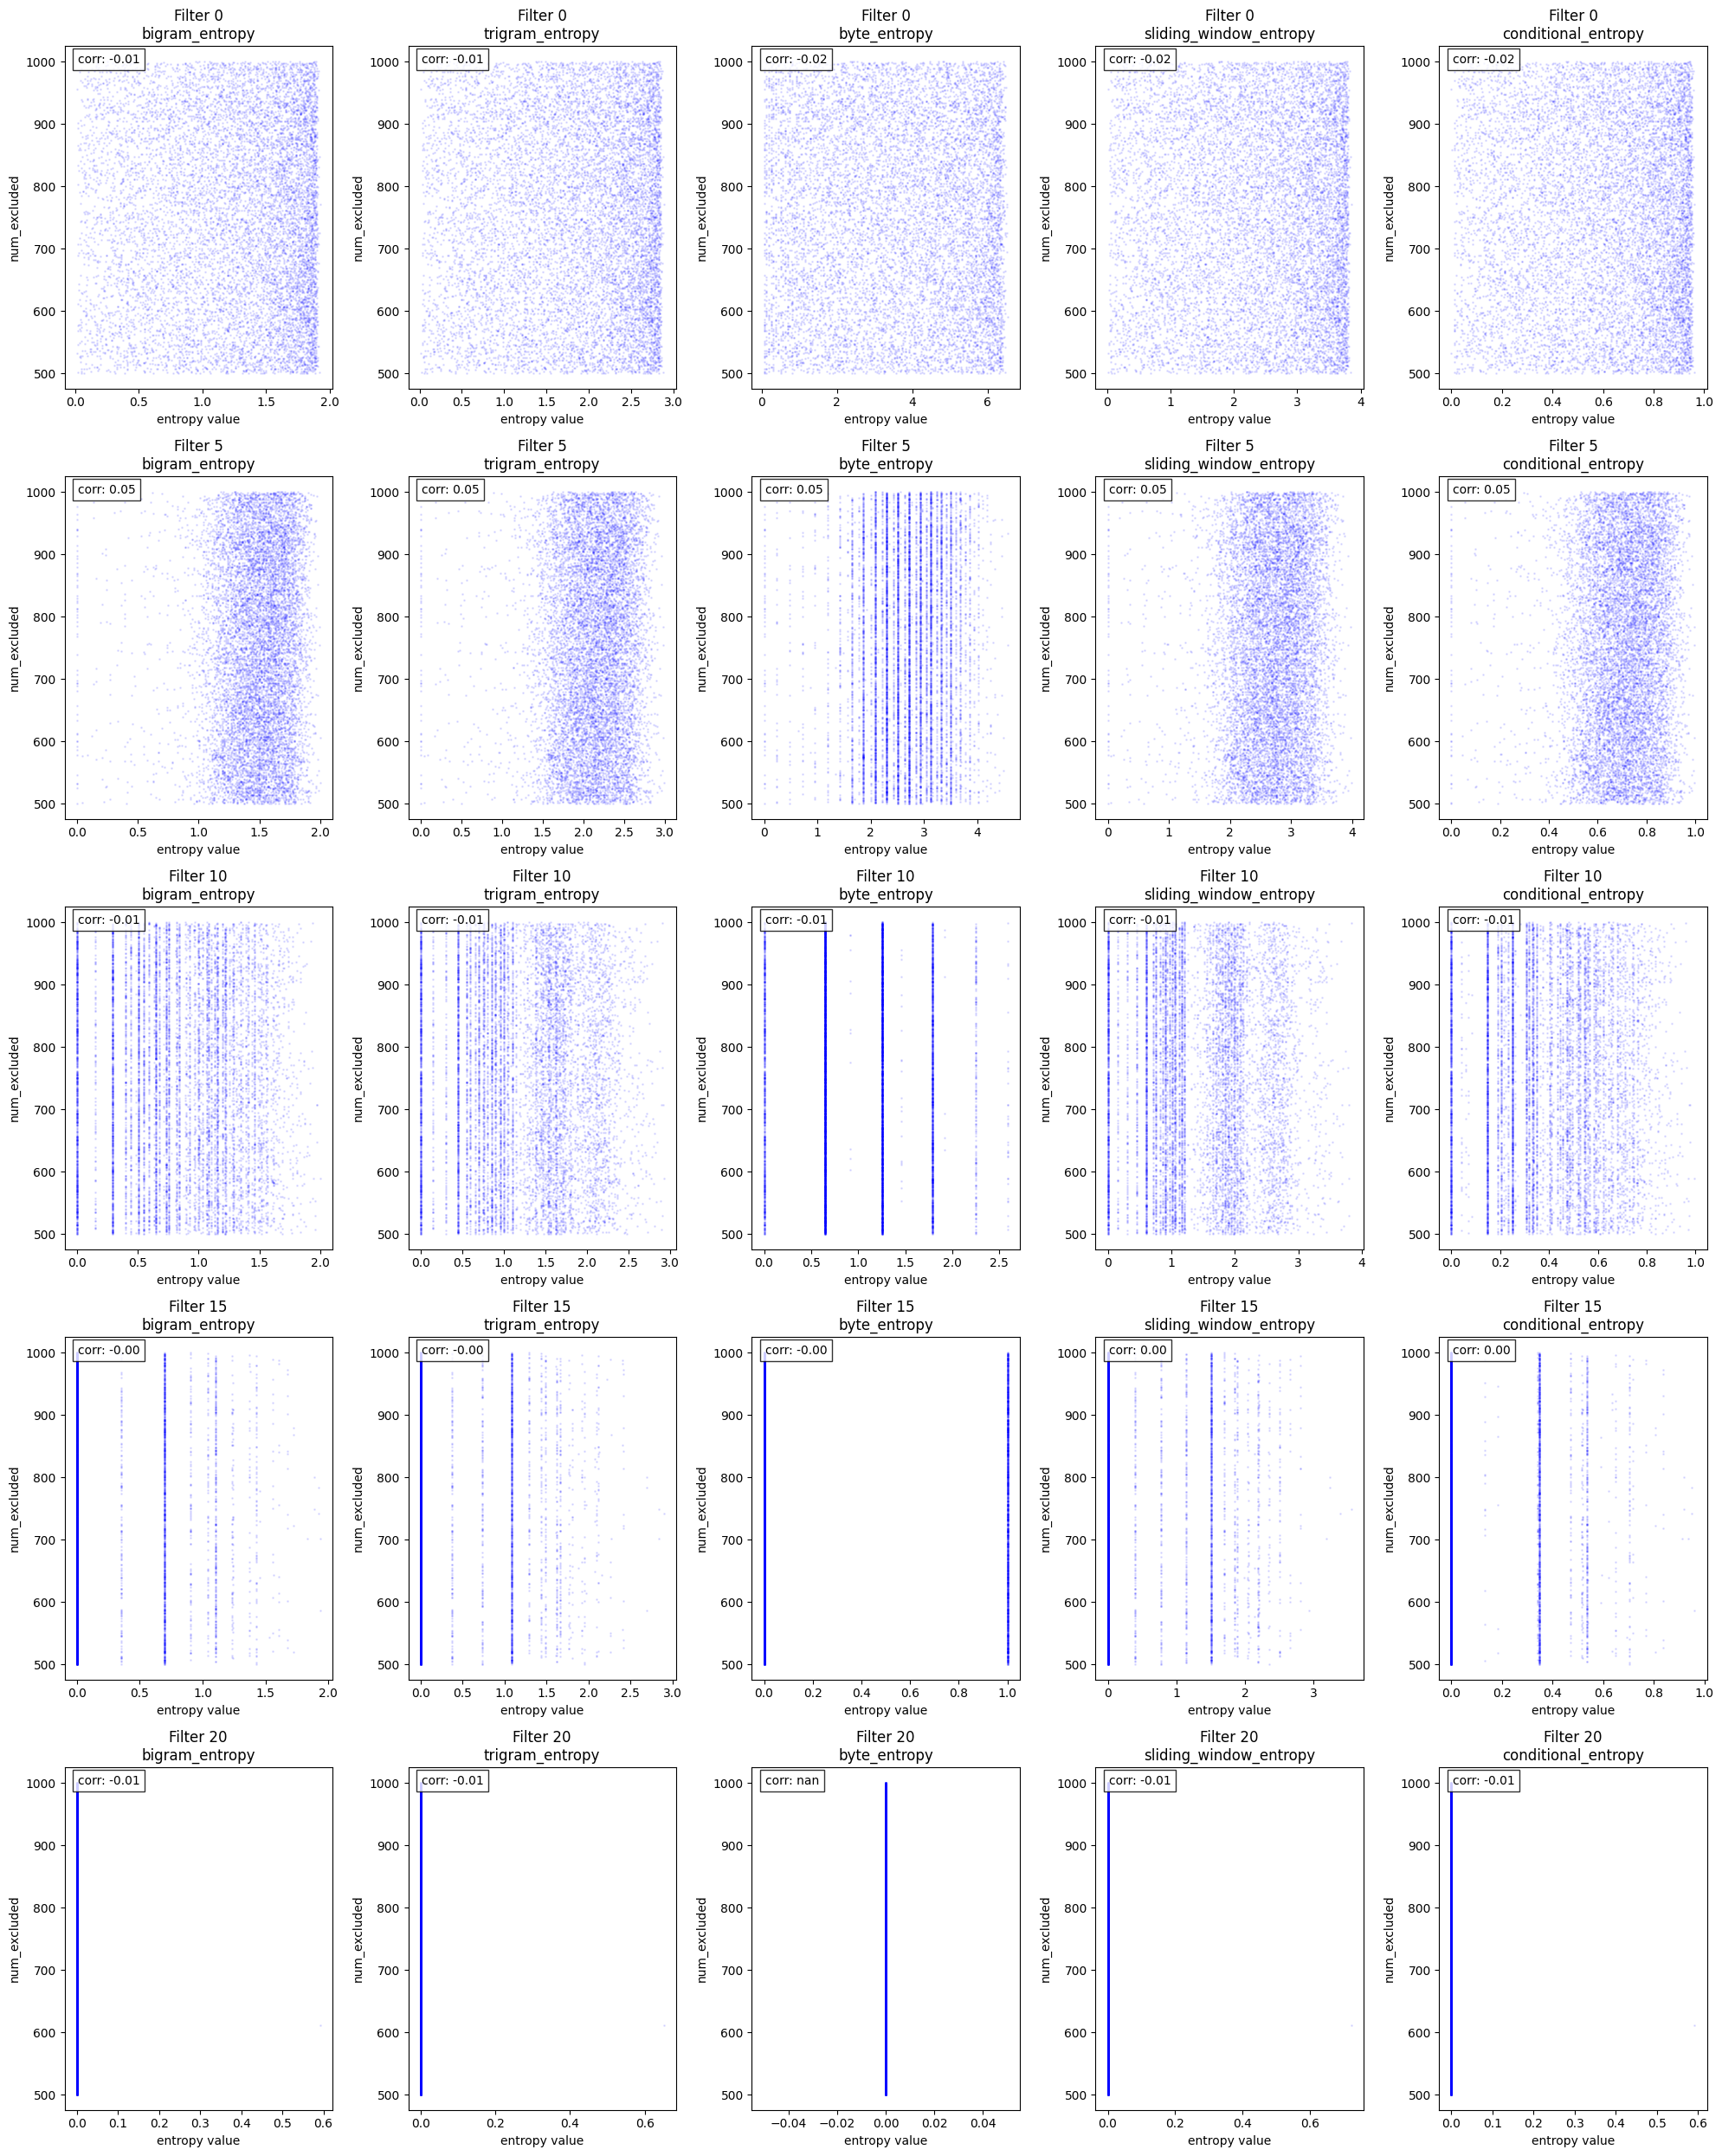

In [86]:
# Create visualization with 5 rows (one per filter) and 5 columns (one per entropy type)
plt.figure(figsize=(20, 25))

for idx, filter_num in enumerate(filters):
    filter_cols = [col for col in entropy_df.columns if f'filter_{filter_num}' in col]
    
    for j, col in enumerate(filter_cols):
        plt.subplot(5, 5, idx*5 + j + 1)
        
        # Use smaller dots and lower alpha for better visibility
        plt.scatter(entropy_df[col], entropy_df['num_excluded'], 
                   alpha=0.1,
                   s=1,
                   color='blue')
        
        # Format title to show just entropy type and filter number
        entropy_type = col.split('_filter_')[0]
        plt.title(f'Filter {filter_num}\n{entropy_type}')
        plt.xlabel('entropy value')
        plt.ylabel('num_excluded')
        
        # Calculate and display correlation
        corr = entropy_df[col].corr(entropy_df['num_excluded'])
        plt.text(0.05, 0.95, f'corr: {corr:.2f}', 
                transform=plt.gca().transAxes,
                bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [88]:
# Print correlations sorted by strength
correlations = entropy_df[all_cols].corrwith(entropy_df['num_excluded'])
print("\nCorrelations with num_excluded (sorted):")
print(correlations.sort_values(ascending=False))


Correlations with num_excluded (sorted):
byte_entropy_filter_5               0.049210
sliding_window_entropy_filter_5     0.048884
conditional_entropy_filter_5        0.048744
trigram_entropy_filter_5            0.048479
bigram_entropy_filter_5             0.045076
sliding_window_entropy_filter_15    0.001441
conditional_entropy_filter_15       0.001070
trigram_entropy_filter_15          -0.000169
bigram_entropy_filter_15           -0.001250
byte_entropy_filter_15             -0.002252
conditional_entropy_filter_10      -0.007308
bigram_entropy_filter_10           -0.008746
trigram_entropy_filter_10          -0.008942
bigram_entropy_filter_20           -0.009640
conditional_entropy_filter_20      -0.009640
sliding_window_entropy_filter_20   -0.009640
trigram_entropy_filter_20          -0.009640
sliding_window_entropy_filter_10   -0.009711
byte_entropy_filter_10             -0.012669
bigram_entropy_filter_0            -0.014121
trigram_entropy_filter_0           -0.014777
conditional_e

C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [91]:
# Calculate distribution features
distribution_features = df['concatenated_bitstrings'].apply(calculate_distribution_features)
distribution_df = pd.DataFrame(distribution_features.tolist())
distribution_df['num_excluded'] = df['num_excluded']

c:\Users\Jonas.Gebele\OneDrive - TUM\Desktop\amq-status-list-notebook\src\utils\feature_extraction.py:115: RuntimeWarning: invalid value encountered in divide
  acf = np.correlate(bits - bits.mean(), bits - bits.mean(), mode='full') / (bits.var() * len(bits))


C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ValueError: num must be an integer with 1 <= num <= 25, not 26

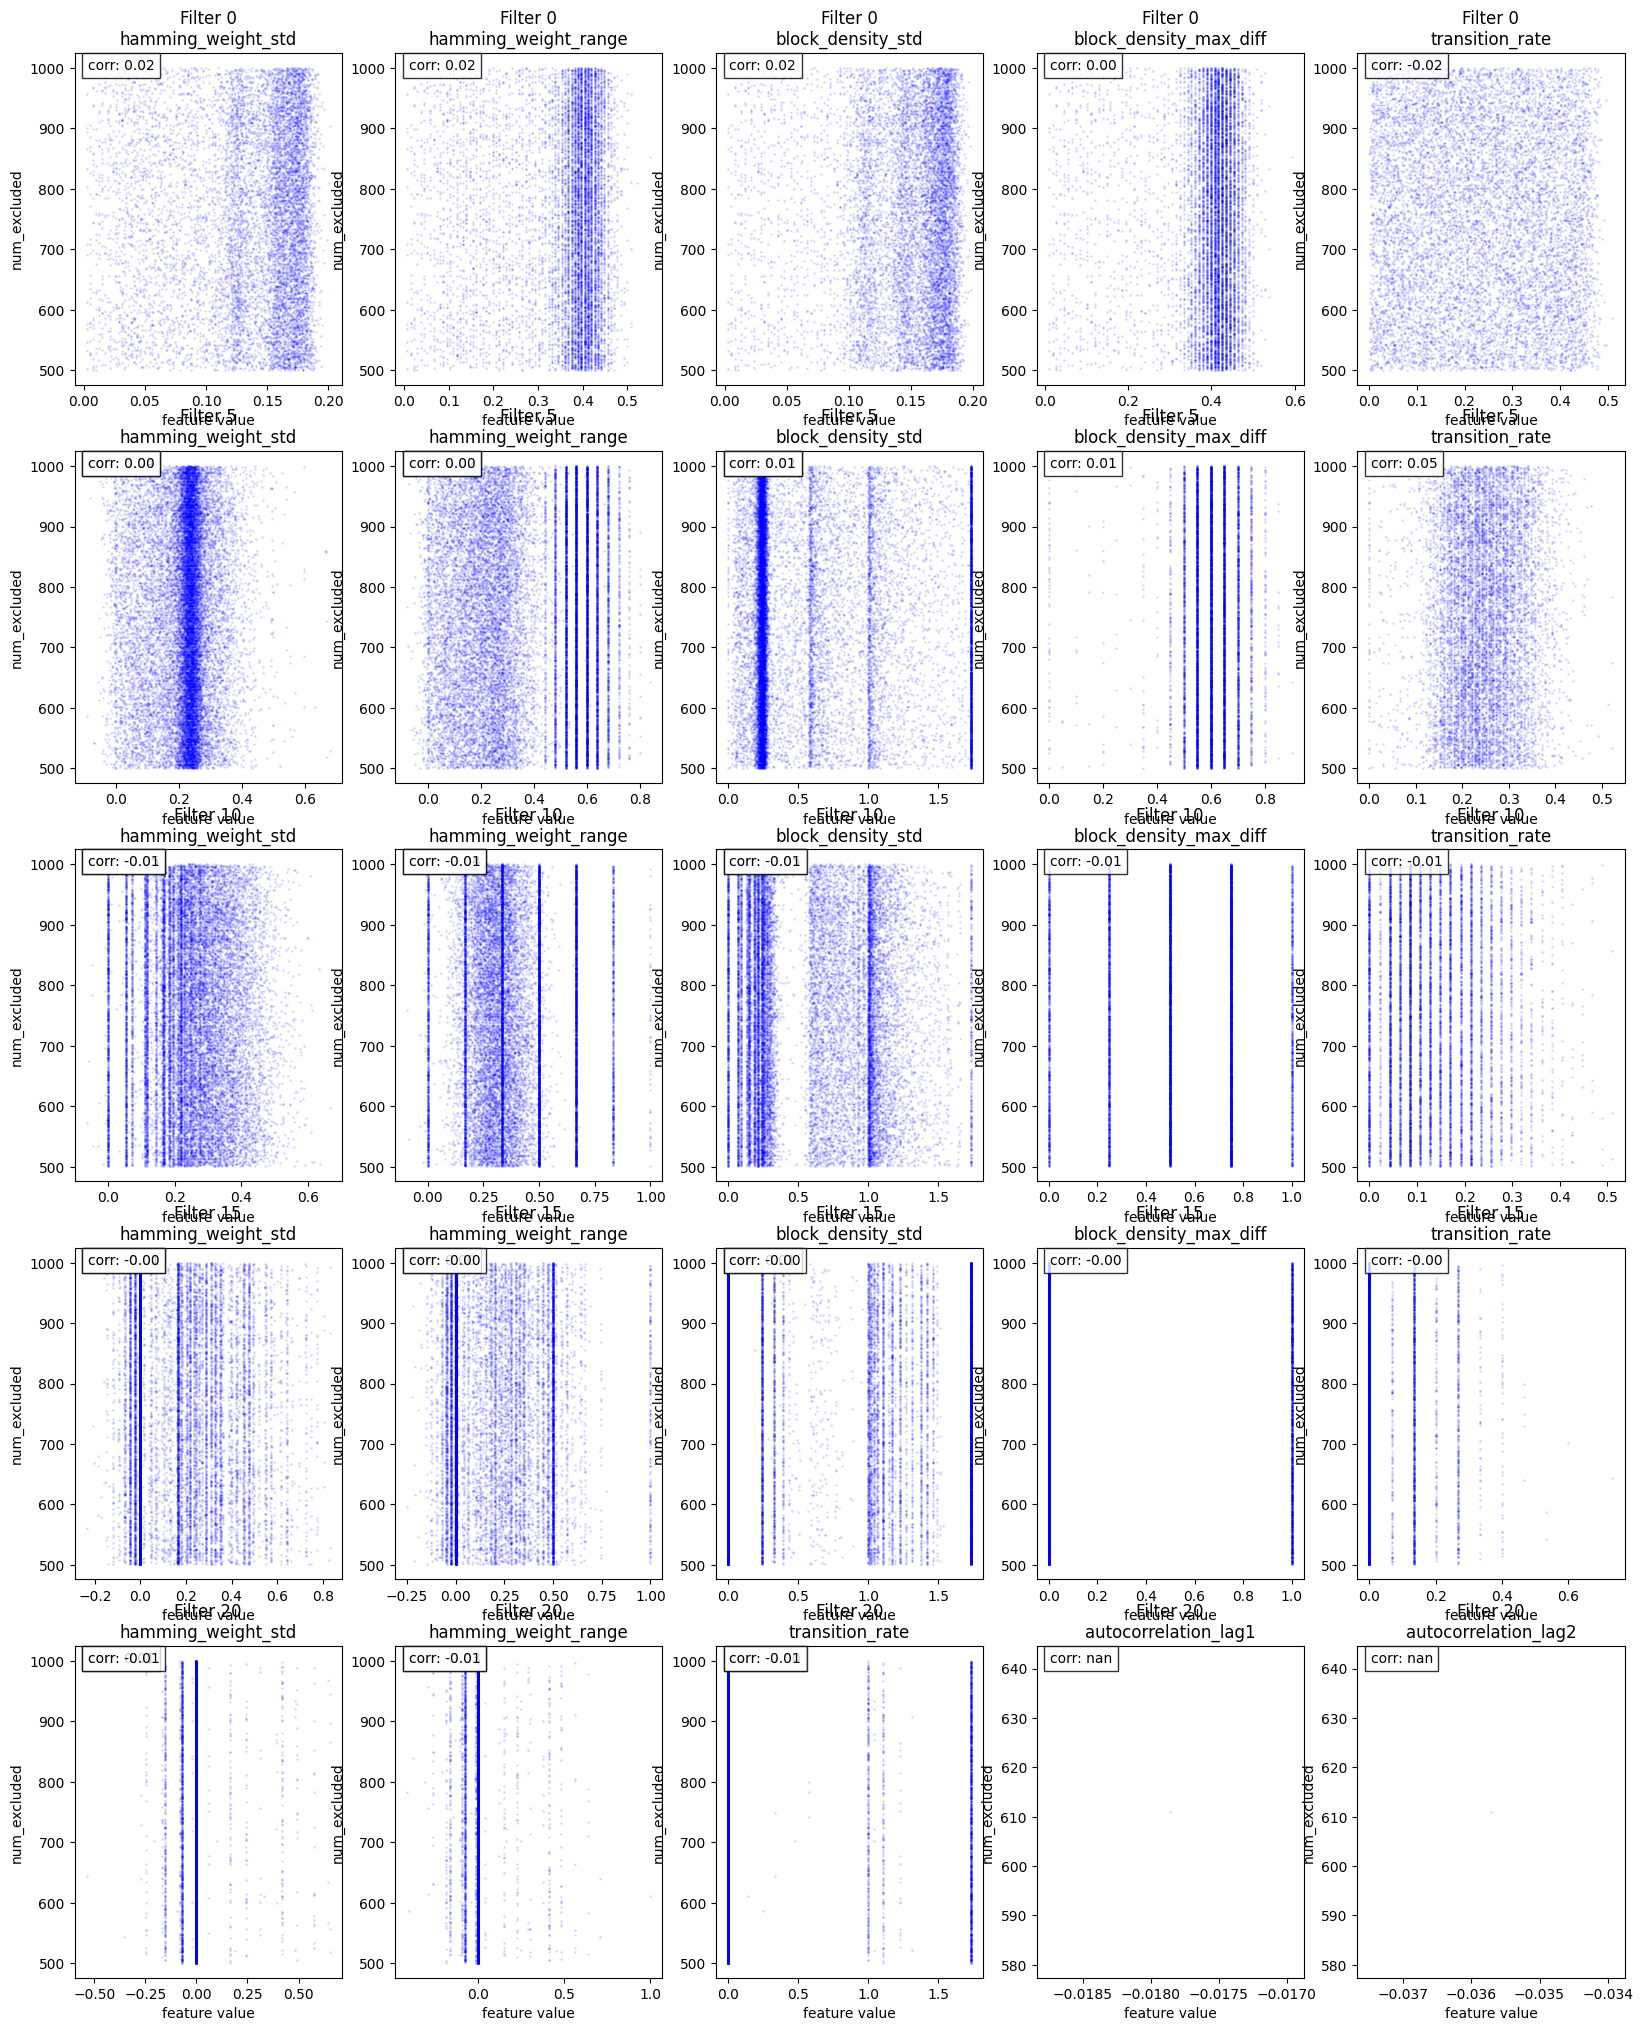

In [92]:
# Select columns for specified filters
filters = [0, 5, 10, 15, 20]
all_cols = []
for f in filters:
    filter_cols = [col for col in distribution_df.columns if f'filter_{f}' in col]
    all_cols.extend(filter_cols)

# Create visualization
plt.figure(figsize=(20, 25))

for idx, filter_num in enumerate(filters):
    filter_cols = [col for col in distribution_df.columns if f'filter_{filter_num}' in col]
    
    for j, col in enumerate(filter_cols):
        plt.subplot(5, 5, idx*5 + j + 1)
        
        # Use smaller dots and lower alpha for better visibility
        plt.scatter(distribution_df[col], distribution_df['num_excluded'], 
                   alpha=0.1,
                   s=1,
                   color='blue')
        
        # Format title to show feature type and filter number
        feature_type = col.split('_filter_')[0]
        plt.title(f'Filter {filter_num}\n{feature_type}')
        plt.xlabel('feature value')
        plt.ylabel('num_excluded')
        
        # Calculate and display correlation
        corr = distribution_df[col].corr(distribution_df['num_excluded'])
        plt.text(0.05, 0.95, f'corr: {corr:.2f}', 
                transform=plt.gca().transAxes,
                bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [94]:
# Print correlations sorted by strength
correlations = distribution_df[all_cols].corrwith(distribution_df['num_excluded'])
print("\nCorrelations with num_excluded (sorted):")
print(correlations.sort_values(ascending=False))


Correlations with num_excluded (sorted):
transition_rate_filter_5                    0.054358
autocorrelation_lag1_filter_0               0.035020
hamming_weight_std_filter_0                 0.024397
autocorrelation_lag2_filter_0               0.022929
local_global_density_ratio_std_filter_0     0.018462
hamming_weight_range_filter_0               0.016847
block_density_std_filter_0                  0.015310
local_global_density_ratio_std_filter_10    0.014019
autocorrelation_lag1_filter_15              0.013880
block_density_max_diff_filter_5             0.010011
block_density_std_filter_5                  0.007525
autocorrelation_lag2_filter_10              0.004582
block_density_max_diff_filter_0             0.001332
hamming_weight_range_filter_5               0.000454
hamming_weight_std_filter_5                 0.000319
hamming_weight_range_filter_15             -0.000657
hamming_weight_std_filter_15               -0.001174
local_global_density_ratio_std_filter_15   -0.001691
bloc

C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [97]:
# Calculate structural features
structural_features = df['concatenated_bitstrings'].apply(calculate_structural_features)
structural_df = pd.DataFrame(structural_features.tolist())
structural_df['num_excluded'] = df['num_excluded']

C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


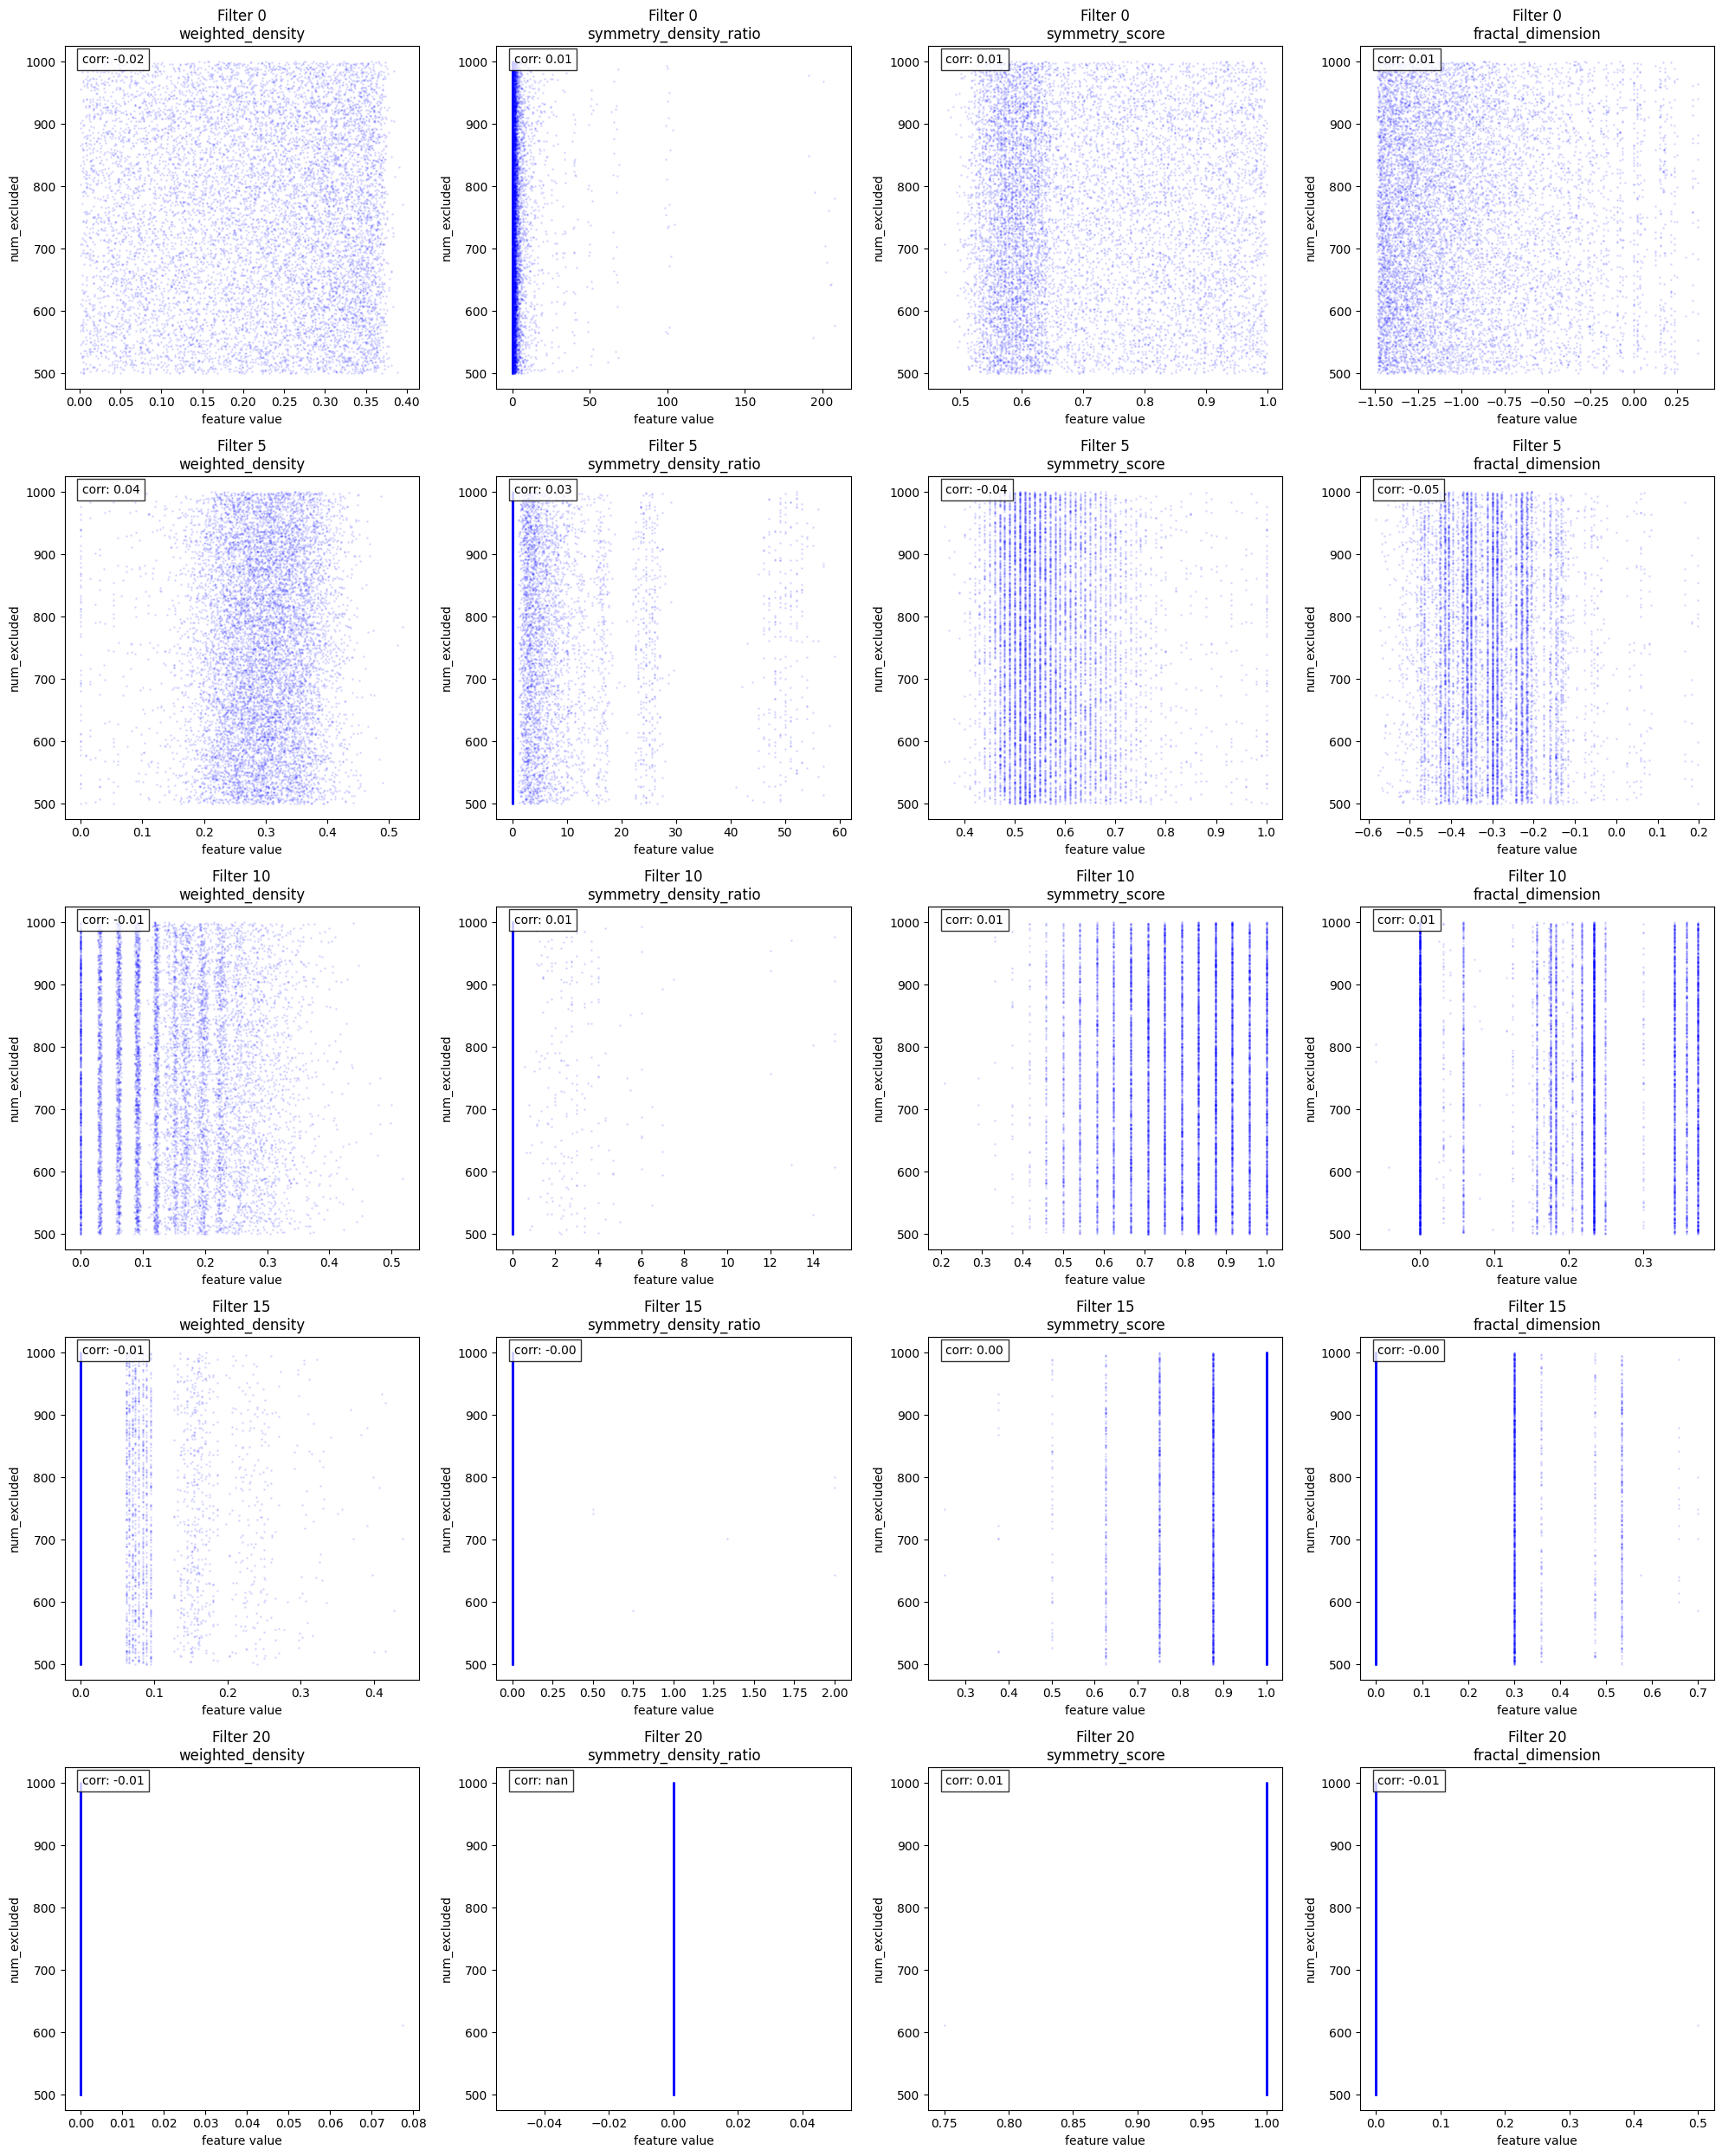

In [98]:
# Select columns for specified filters
filters = [0, 5, 10, 15, 20]
all_cols = []
for f in filters:
    filter_cols = [col for col in structural_df.columns if f'filter_{f}' in col]
    all_cols.extend(filter_cols)

# Create visualization
plt.figure(figsize=(20, 25))

total_features = len([col for col in structural_df.columns if f'filter_0' in col])
plot_rows = len(filters)
plot_cols = total_features

for idx, filter_num in enumerate(filters):
    filter_cols = [col for col in structural_df.columns if f'filter_{filter_num}' in col]
    
    for j, col in enumerate(filter_cols):
        plt.subplot(plot_rows, plot_cols, idx*plot_cols + j + 1)
        
        # Use smaller dots and lower alpha for better visibility
        plt.scatter(structural_df[col], structural_df['num_excluded'], 
                   alpha=0.1,
                   s=1,
                   color='blue')
        
        # Format title to show feature type and filter number
        feature_type = col.split('_filter_')[0]
        plt.title(f'Filter {filter_num}\n{feature_type}')
        plt.xlabel('feature value')
        plt.ylabel('num_excluded')
        
        # Calculate and display correlation
        corr = structural_df[col].corr(structural_df['num_excluded'])
        plt.text(0.05, 0.95, f'corr: {corr:.2f}', 
                transform=plt.gca().transAxes,
                bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [99]:
# Print correlations sorted by strength
correlations = structural_df[all_cols].corrwith(structural_df['num_excluded'])
print("\nCorrelations with num_excluded (sorted):")
print(correlations.sort_values(ascending=False))


Correlations with num_excluded (sorted):
weighted_density_filter_5           0.044785
symmetry_density_ratio_filter_5     0.028680
symmetry_score_filter_10            0.013199
fractal_dimension_filter_0          0.011817
fractal_dimension_filter_10         0.011693
symmetry_score_filter_0             0.011319
symmetry_score_filter_20            0.009640
symmetry_density_ratio_filter_0     0.008919
symmetry_density_ratio_filter_10    0.006321
symmetry_score_filter_15            0.003608
fractal_dimension_filter_15        -0.002566
symmetry_density_ratio_filter_15   -0.004293
weighted_density_filter_15         -0.005101
fractal_dimension_filter_20        -0.009640
weighted_density_filter_20         -0.009640
weighted_density_filter_10         -0.012464
weighted_density_filter_0          -0.016074
symmetry_score_filter_5            -0.037606
fractal_dimension_filter_5         -0.050601
symmetry_density_ratio_filter_20         NaN
dtype: float64


C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Jonas.Gebele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [101]:
# Calculate statistical features
statistical_features = df['concatenated_bitstrings'].apply(calculate_statistical_features)
statistical_df = pd.DataFrame(statistical_features.tolist())
statistical_df['num_excluded'] = df['num_excluded']

c:\Users\Jonas.Gebele\OneDrive - TUM\Desktop\amq-status-list-notebook\src\utils\feature_extraction.py:169: RuntimeWarning: invalid value encountered in divide
  spectrum_norm = spectrum / sum(spectrum)


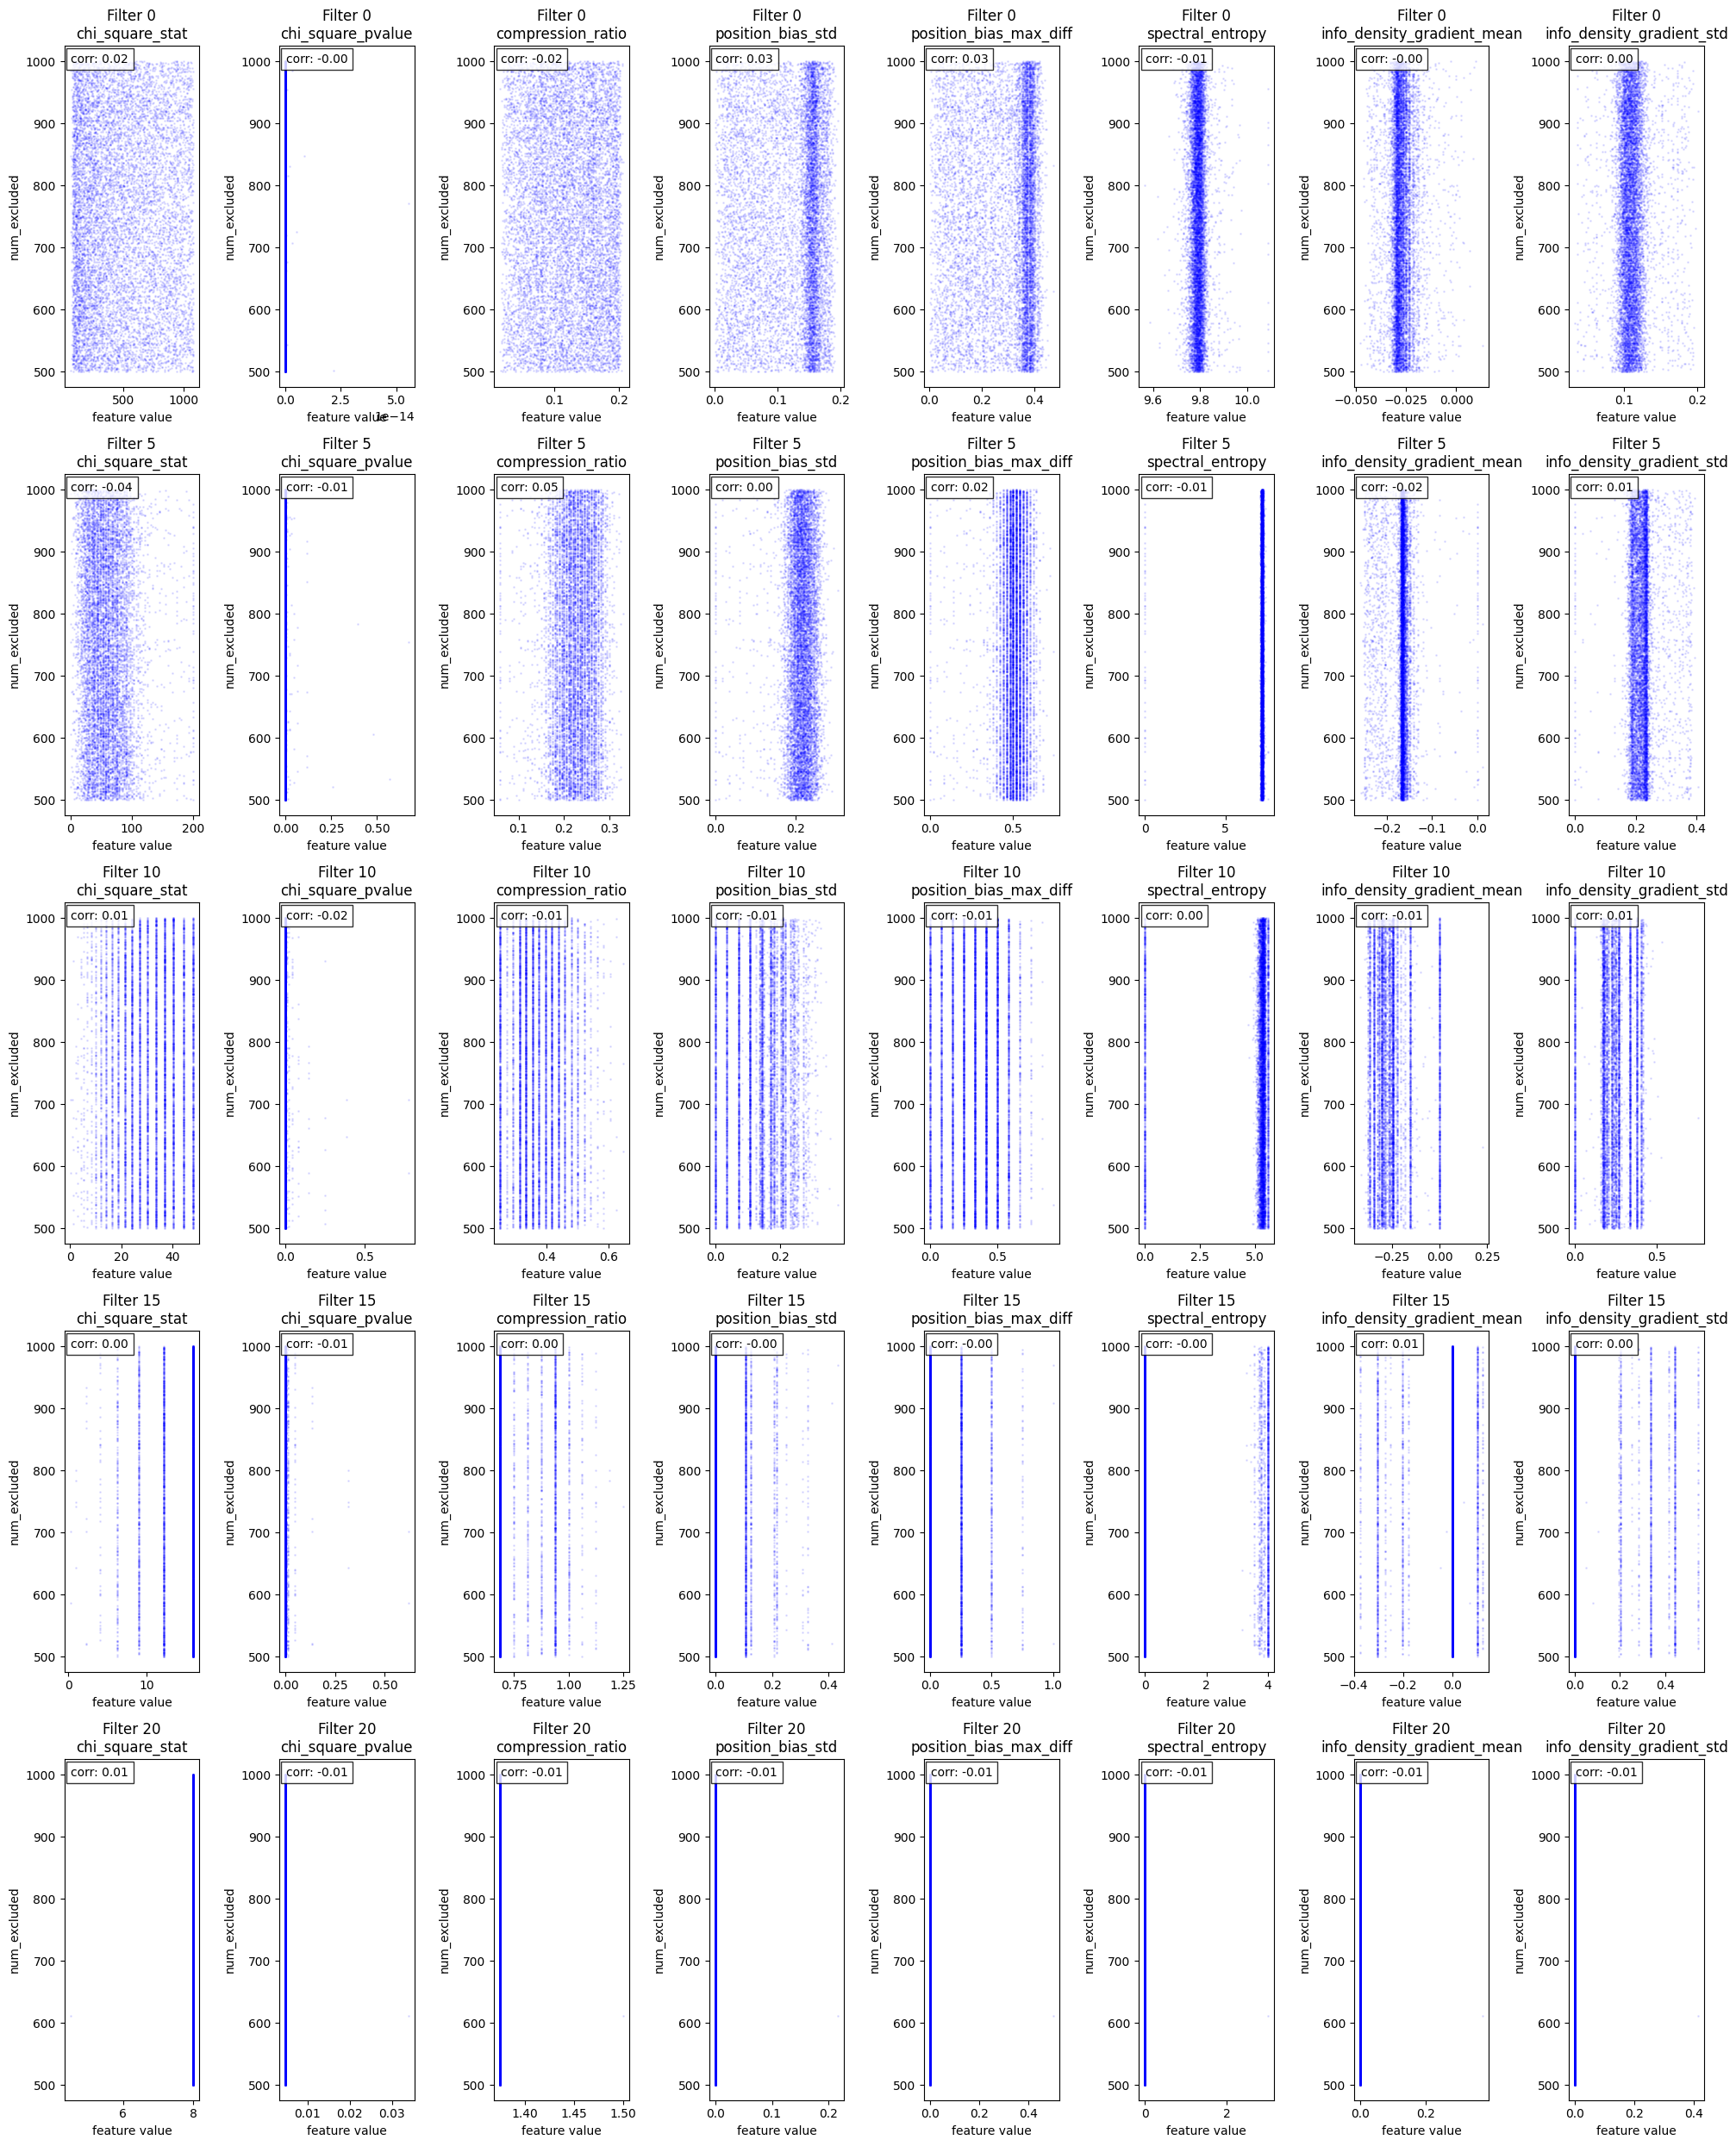

In [102]:
# Select columns for specified filters
filters = [0, 5, 10, 15, 20]
all_cols = []
for f in filters:
    filter_cols = [col for col in statistical_df.columns if f'filter_{f}' in col]
    all_cols.extend(filter_cols)

# Create visualization
plt.figure(figsize=(20, 25))

total_features = len([col for col in statistical_df.columns if f'filter_0' in col])
plot_rows = len(filters)
plot_cols = total_features

for idx, filter_num in enumerate(filters):
    filter_cols = [col for col in statistical_df.columns if f'filter_{filter_num}' in col]
    
    for j, col in enumerate(filter_cols):
        plt.subplot(plot_rows, plot_cols, idx*plot_cols + j + 1)
        
        # Use smaller dots and lower alpha for better visibility
        plt.scatter(statistical_df[col], statistical_df['num_excluded'], 
                   alpha=0.1,
                   s=1,
                   color='blue')
        
        # Format title to show feature type and filter number
        feature_type = col.split('_filter_')[0]
        plt.title(f'Filter {filter_num}\n{feature_type}')
        plt.xlabel('feature value')
        plt.ylabel('num_excluded')
        
        # Calculate and display correlation
        corr = statistical_df[col].corr(statistical_df['num_excluded'])
        plt.text(0.05, 0.95, f'corr: {corr:.2f}', 
                transform=plt.gca().transAxes,
                bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
# Print correlations sorted by strength
correlations = statistical_df[all_cols].corrwith(statistical_df['num_excluded'])
print("\nCorrelations with num_excluded (sorted):")
print(correlations.sort_values(ascending=False))